# IEooc Methods_3 Software_001

## Basic data handling: Reading and inspecting data, plotting and saving results

This Jupyter notebook contains explanations on how to use the Python programming language for calculating energy use and emissions of the vehicle fleet for a future scenario.

The data handling and calculation steps are explained stepy by step. 
Additional information on how to work with the notebooks can be obtained via 
https://www.dataquest.io/blog/jupyter-notebook-tutorial/

## Problem setting: Monitoring the transformation of the vehicle fleet in Freiburg

In Freiburg, there were about 95000 passenger vehicles in 2022, which is about 400 vehicles per 1000 inhabitants (with a population of about 236000 people)
https://www.freiburg.de/pb/1649864.html 

These emitted at total of about 300000 tons of CO2 in 2022.
Source: Hertle and Gugel (2022). CO2-Bilanz Energie und Verkehr für die Stadt Freiburg bis 2020, ifeu Heidelberg.
https://www.freiburg.de/pb/site/Freiburg/get/params_E548774210/2059583/Bericht_Klimabilanz_Freiburg_2019_2020.pdf 
(Total traffic emissions were at about 450000 tons, most of which (ca. 2/3) come from passenger vehicles.)

From the city's ambition to become 'climate neutral' by 2035 follows that the vehicle fleet must be transformed to low carbon alternatives. The purpose of this software is to model such a fleet transformation and estimate the potential impact of different emissions reduction strategies, such as vehicle fuel efficiency, a fuel shift to electric vehicles, and the use of a low carbon electricity mix.

**This calculation exercise covered the stock, energy flow, and enery supply steps of the energy service cascade.**

The data workbook *IEooc_Methods3_Software001_Data.xlsx* contains a number of parameters for the calculation.

The core of the fleet model is a description of the future vehicle fleet (or stock) *S* by year *t* and age-cohort (or year of registration) *c*: *S(t,c)*. For the purpose of this exercise, the age-cohort structure of the stock and its total future size is given as input data. The stock grows from about 95000 vehicles in 2022 to about 108000 in 2035, about 113000 in 2050, and about 11600 in 2060. This increase reflects the expected future population growth.

In a first step, we read these data into Python, inspect them, and plot them.

In [1]:
# import required libraries
import pandas as pd   # dataframe library, used for fast import/export from/to excel and for organizing the data.
import numpy as np    # math library
import matplotlib.pyplot as plt  # plotting library

In [2]:
# read input data from excel into dataframe
df_fleet = pd.read_excel('IEooc_Methods3_Software001_Data.xlsx', sheet_name='Fleet', index_col=0)
df_fleet # print data

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
"year \ age-cohort, number of passenger vehicles in Freiburg",,,,,,,,,,,,,,,,,,,,,
2020,2403,2696,2994,3291,3584,3868,4346,4614,4861,5087,...,0,0,0,0,0,0,0,0,0,0
2021,2119,2403,2696,2993,3291,3584,4062,4346,4614,4862,...,0,0,0,0,0,0,0,0,0,0
2022,1848,2119,2403,2696,2993,3291,3763,4062,4347,4615,...,0,0,0,0,0,0,0,0,0,0
2023,1593,1847,2119,2402,2695,2993,3456,3763,4062,4347,...,0,0,0,0,0,0,0,0,0,0
2024,1357,1593,1847,2118,2402,2695,3143,3456,3763,4062,...,0,0,0,0,0,0,0,0,0,0
2025,1142,1357,1593,1847,2118,2402,2830,3143,3456,3764,...,0,0,0,0,0,0,0,0,0,0
2026,950,1142,1357,1592,1847,2118,2522,2830,3143,3456,...,0,0,0,0,0,0,0,0,0,0
2027,780,950,1142,1357,1592,1847,2224,2522,2830,3143,...,0,0,0,0,0,0,0,0,0,0
2028,633,780,950,1142,1357,1592,1939,2224,2523,2831,...,0,0,0,0,0,0,0,0,0,0


### Task 1: What is the meaning of the data shown above? What is the meaning of the row index, and what is the meaning of the column index? Exactly how large was the car fleet at the end of 2022? What is the meaning of a given column in this table?

To tackle this questions, we first plot the data in the above table to have a nice visual inspection of them.

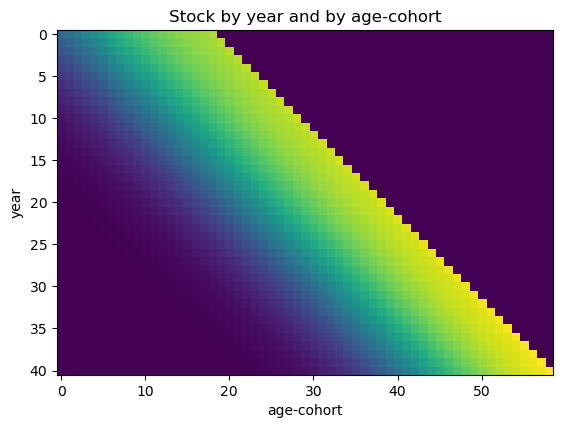

In [3]:
plt.imshow(df_fleet.values,interpolation='nearest') # create a simple heatmap: larger value --> brighter color.
plt.xlabel('age-cohort')    # add x axis label 
plt.ylabel('year')          # add y axis label
plt.title('Stock by year and by age-cohort') # add title
plt.show(); # show plot with all features from above

With the information above, the following questions can now be answered:

**What is the meaning of the data shown above?** The table shows the size of the fleet of passenger vehicles for Freiburg for each future year from 2020 to 2060, given by the row index. For each future year, the fleet consists of vehicles from different age-cohorts (year of manufacturing). For each year (row), the fleet can therefore be broken down into different age-cohorts (column index), showing the manufacturing year (from 2002 to 2060). The new cars of each year are on the diagonal, where year = age-cohort. 

**What is the meaning of the row index, and what is the meaning of the column index?** 
The row indicates the future year, and the column the year of manufacturing (age-cohort). 

**Exactly how large was the car fleet at the end of 2022?** to answer this question, we take the corresponding row of the table and sum it up. In Python, this is done as follows:

In [4]:
# First, select the third row, which is index 2, since in Python, we start counting at 0.
# Then, selet all columns (all age-cohorts), indicated by ':'.
# Lastly, sum up over this table row by the .sum() command.
Stock_2022 = df_fleet.values[2,:].sum()
Stock_2022 # print the total stock in 2022, unit: vehicles

94962

According to this fleet table, the 2022 stock was about 95000 passenger vehicles.

**What is the meaning of a given column in this table?**
A given table row traces a given age-cohort over time. The following plot illustrates this behaviour of the age-cohort of 2026:

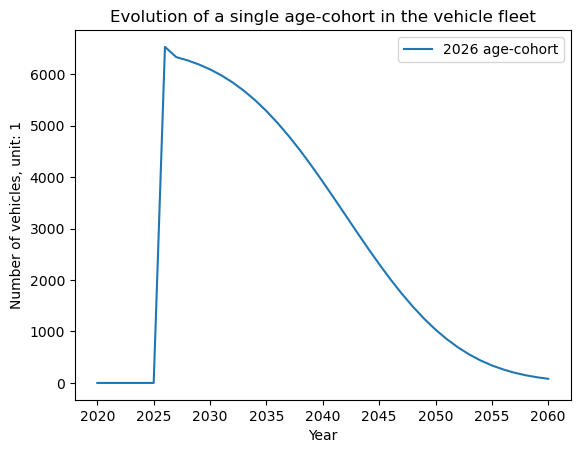

In [5]:
plt.plot(np.arange(2020,2061,1),df_fleet.values[:,24])
plt.title('Evolution of a single age-cohort in the vehicle fleet')
plt.ylabel('Number of vehicles, unit: 1')
plt.xlabel('Year')
plt.legend(['2026 age-cohort'])

For the year of production of the age-cohort, the stock of this particular age-cohort is maximal. Before the production year, the value (stock) of this age-cohort in the stock is zero, of course, as no cars from the future exist in the current stock. 
As the cohort ages, more and more vehicles are scrapped from this age-cohorts, first, only few, then, around the average lifetime of 15 years, many cars, and slowly, this age-cohort fades out.

### Task 2: Calculate future fleet-wide energy demand by factoring in the kilometrage (by time) and the specific energy demand per km (per age-cohort)

For each year *t*, the time series *km(t)* indicates how many km each car is driven per year on average. This value may change over time, it may increase, for example, if more cars are used for carsharing. 

For each age-cohort, the cars have a specific fuel efficieny *MJ(c)*, which can decline over time, as cars become more fuel efficient due to better engineering, or increase over time, as cars become larger.

The total energy consumption of the fleet, *E(t)*, is given by the following equation:

$$ E(t) = \sum_c MJ(c) \cdot km(t) \cdot S(t,c) $$

Below, we first read the data for *km(t)* and *MJ(c)* into the workspace and then compute the total fleet energy consumption, using the np.einsum function for multiplication and summation across multiple indices.

In [6]:
df_km = pd.read_excel('IEooc_Methods3_Software001_Data.xlsx', sheet_name='Kilometrage', index_col=0)
df_km # print data

,kilometrage (km/vehicle per year)
year,
2020,14000
2021,14000
2022,14000
2023,14000
2024,14000
2025,14000
2026,14100
2027,14200
2028,14300


In [7]:
df_MJ = pd.read_excel('IEooc_Methods3_Software001_Data.xlsx', sheet_name='Fuel_Consumption', index_col=0)
df_MJ # print data

,"specific fuel consumption in MJ/km, gasoline","specific fuel consumption in MJ/km, electric"
year,,
2002,3.00,0.70
2003,3.00,0.70
2004,3.00,0.70
2005,3.00,0.70
2006,3.00,0.70
2007,3.00,0.70
2008,3.00,0.70
2009,3.00,0.70
2010,3.00,0.70


In [8]:
S_t_c = df_fleet.values        # convert pandas dataframe values to numpy array
km_t  = df_km.values.squeeze() # ignore additional dimension of length 1
MJ_c  = df_MJ.values           # convert pandas dataframe values to numpy array


In [9]:
S_t_c.shape # inspect the shape of each array or time series

(41, 59)

In [10]:
km_t.shape # inspect the shape of each array or time series

(41,)

In [11]:
MJ_c.shape # inspect the shape of each array or time series

(59, 2)

In [12]:
MJ_c[:,0].shape # Select all rows (':') and only the first column (for gasoline vehicles)

(59,)

In [13]:
E_t = np.einsum('tc,c,t->t',S_t_c,MJ_c[:,0],km_t) 
# calculate fleet-wide energy consumption as time series, using the MJ/km for gasoline vehicles.

In [14]:
E_t.shape # shape: time series length(41 years)

(41,)

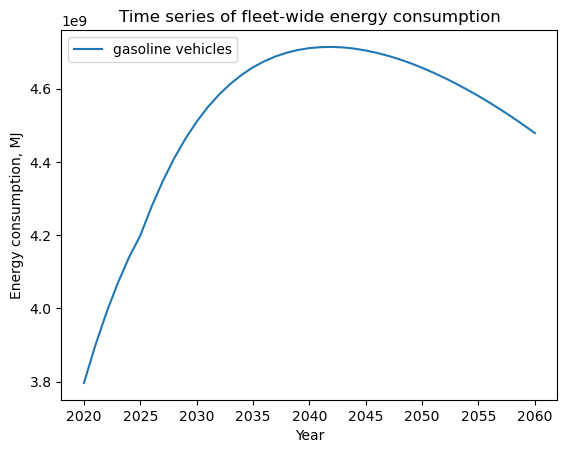

In [15]:
plt.plot(np.arange(2020,2061,1),E_t) # plot with given x-axis values, generated with the np.arange command
plt.title('Time series of fleet-wide energy consumption')
plt.ylabel('Energy consumption, MJ')
plt.xlabel('Year')
plt.legend(['gasoline vehicles'])
plt.savefig('Energy_gasoline_t.png', dpi = 300) # save figure with the modifications made above.

We see that the total energy consumption of the fleet keeps increasing roughly lineary, as both the fleet size and the annual kilometrage increase, while the energy consumption per km decreases.

### Task 3: Repeat the calculation of the energy consumption of the fleet for two scenarios (gasoline and electric) at the same time!

Now, we repeat the calulations for two scenarios at the same time, introducing the *T* dimension for the different drive technologies (gasoline and battery electric), for which we have data in *MJ_c*. Here, the assumption is that the entire fleet is either gasoline (case 1) or electric (case 2) vehicles, which is done to keep the calculation simple for the moment:

$$ E(t,T) = \sum_c MJ(c,T) \cdot km(t) \cdot S(t,c) $$

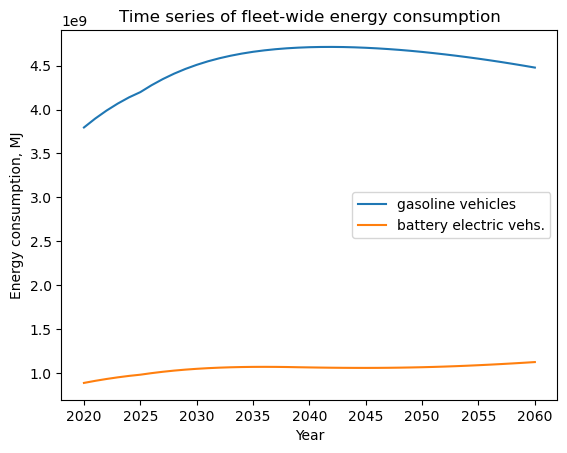

In [16]:
E_t_T = np.einsum('tc,cT,t->tT',S_t_c,MJ_c,km_t) # take full array MJ_c with c and T dimensions

E_t_T.shape # has now an extra dimension for the drive technology scenario.

plt.plot(np.arange(2020,2061,1),E_t_T) # plot the result
plt.title('Time series of fleet-wide energy consumption')
plt.ylabel('Energy consumption, MJ')
plt.xlabel('Year')
plt.legend(['gasoline vehicles','battery electric vehs.'])
plt.savefig('Energy_2technologies_t.png', dpi = 300)

We see that both curves keep on increasing, the blue one is as before, and the orange one (for the electric vehicle alternative) runs at much lower values due to the generally lower specific energy consumption of electric vehicle, which is a consequence of the high energy efficiency of electric motors and batteries. 

### Task 4: Calculate the fleet-wide emissions for a given scenario of electric vehicle shares in new registration and grid decarbonisation!

With the split parameter on sheet BEV_share in the data sheet, we have an age-cohort specific breakdown *SHARE(c,T)* of the vehicle fleet into different drive technologies.
From this breakdown, we can compute the total energy consumption as follows, with the second dimension of the fuel intensity *MJ* as technology *T*:

$$ E(t) = \sum_{c,T} SHARE(c,T) \cdot MJ(c,T) \cdot km(t) \cdot S(t,c) $$

$$ GHG(t) = \sum_{c,T} GHG(t,T) \cdot SHARE(c,T) \cdot MJ(c,T) \cdot km(t) \cdot S(t,c) $$

In [17]:
df_Share = pd.read_excel('IEooc_Methods3_Software001_Data.xlsx', sheet_name='BEV_share', index_col=0)
SHARE_T = df_Share.values/100 # covert from % to 1.
SHARE_T.shape

(59, 2)

In [18]:
df_GHG = pd.read_excel('IEooc_Methods3_Software001_Data.xlsx', sheet_name='GHG_intensity', index_col=0)
GHG_energy_t = df_GHG.values
GHG_energy_t.shape

(41, 2)

In [19]:
E_t_Mix = np.einsum('tc,cT,cT,t->t',S_t_c,MJ_c,SHARE_T,km_t)/1e6 # take full array MJ_c with c and T dimensions
# Convert unit from MJ to TJ.

E_t_Mix.shape # has no extra dimension as we sum up over both drive technologies

(41,)

In [20]:
GHG_t_Mix = np.einsum('tc,cT,cT,tT,t->t',S_t_c,MJ_c,SHARE_T,GHG_energy_t,km_t)/1e6 # take full array MJ_c with c and T dimensions
# Convert unit from g to t.

GHG_t_Mix.shape # has no extra dimension as we sum up over both drive technologies

(41,)

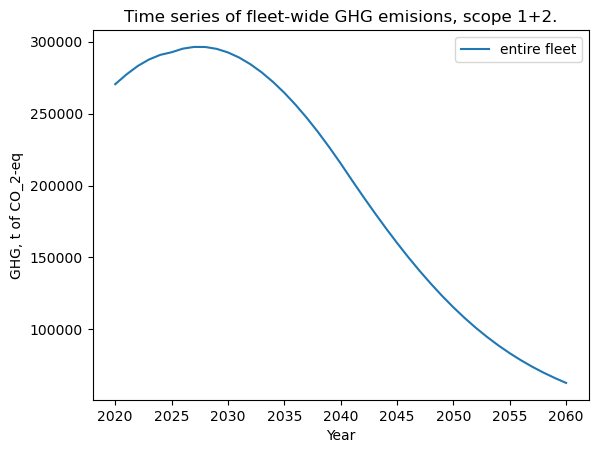

In [21]:
plt.plot(np.arange(2020,2061,1),GHG_t_Mix) # plot the result
plt.title('Time series of fleet-wide GHG emisions, scope 1+2.')
plt.ylabel('GHG, t of CO_2-eq')
plt.xlabel('Year')
plt.legend(['entire fleet'])
plt.savefig('GHG_fleet_t.png', dpi = 300)

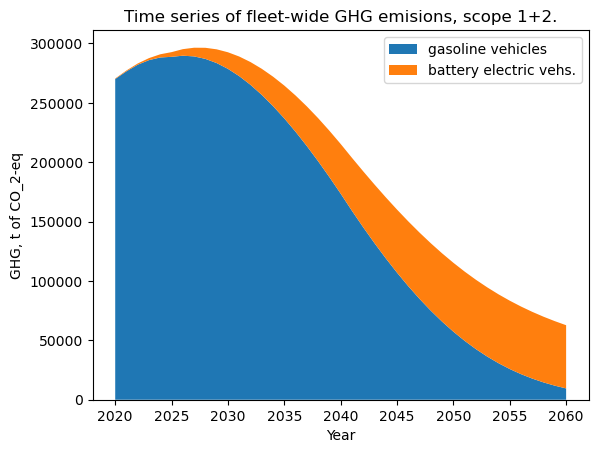

In [22]:
# re-calculate the fleet-wide GHG emissions, this time, keep the drive technologies T separate
GHG_t_T = np.einsum('tc,cT,cT,tT,t->tT',S_t_c,MJ_c,SHARE_T,GHG_energy_t,km_t)/1e6 # take full array MJ_c with c and T dimensions

plt.stackplot(np.arange(2020,2061,1),GHG_t_T[:,0],GHG_t_T[:,1]) # plot the result
plt.title('Time series of fleet-wide GHG emisions, scope 1+2.')
plt.ylabel('GHG, t of CO_2-eq')
plt.xlabel('Year')
plt.legend(['gasoline vehicles','battery electric vehs.'])
plt.savefig('GHG_fleet_t_T.png', dpi = 300)

From the figures, we can see that for the given scenario of future increase in demand, electric vehicle phase-in and electricity decarbonisation, GHG emissions are first bound to rise until they peak between 2025 and 2030. Then, a sharp decline down to about 1/3 of the peak value will occur.

Policy-relevant claim: Due to the slow phase-in of electric vehicles, the relatively slow decarbonisation of electricity supply, and the lock-in of the existing fleet (15 years vehicle lifetime!), a focus on BEVs for individual passenger transport will NOT bring the city of Freiburg ANYWHERE near its climate neutrality target for 2035, where we still have GHG emissions of 250 kt CO2-eq/yr.

### Task 5: Export your central results to excel!

First, we create new dataframe from a calculated result and store it to Excel for archiving and futher analysis/inspection.

In [23]:
export_df= pd.DataFrame(data=E_t,      # values
            index=np.arange(2020,2061,1),        # 1st column as index
            columns=['Energy consumption, MJ'])  # 1st row as the column names
export_df

,"Energy consumption, MJ"
2020,3.796254e+09
2021,3.897810e+09
2022,3.988404e+09
2023,4.068666e+09
2024,4.139394e+09
2025,4.198864e+09
2026,4.277856e+09
2027,4.347859e+09
2028,4.409501e+09
2029,4.463232e+09


In [24]:
export_df.to_excel('IEooc_M3_Software001_Output_Single.xlsx', merge_cells=False)

Second, we create another dataframe and export several dataframes to different Excel sheets, using an xlsxwriter instance.

In [25]:
pd_xlsx_writer = pd.ExcelWriter('IEooc_M3_Software001_Output_Multiple.xlsx', engine="xlsxwriter")

In [26]:
export_df.to_excel(pd_xlsx_writer, sheet_name="EnergyCons_MJ_gasoline", merge_cells=False)   

export_df2= pd.DataFrame(data=GHG_t_Mix,      # values
            index=np.arange(2020,2061,1),        # 1st column as index
            columns=['GHG, fleet-wide, t CO2-eq/yr'])   # 1st row as the column names

export_df2.to_excel(pd_xlsx_writer, sheet_name="GHG_fleet_mix", merge_cells=False)   

pd_xlsx_writer.close()



This export concludes this introductory exercise.